In [1]:
#Calling out packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler



from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

ss=StandardScaler()

log=LogisticRegressionCV()
nb=GaussianNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adaboost=AdaBoostClassifier()
bag=BaggingClassifier()
grad=GradientBoostingClassifier()
nn=MLPClassifier()

models=[log,nb,knn,dt,rf,adaboost,bag,grad,nn]




sns.set({'figure.figsize':(12,8)})
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import time

%matplotlib inline

In [2]:
#Quantile Function for Outliers.
def quantile_fun(col):

    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    iqr=q3-q1
    lw=q1-(1.5*iqr) #LowerWhisker
    uw=q3+(1.5*iqr) #UpperWhisker
    new_col=[]
    for i in col:
        if i<lw:
            i=lw
            new_col.append(i)
        elif i>uw:
            i=uw
            new_col.append(i)
        else:
            i=i
            new_col.append(i)
    return np.array(new_col)

In [3]:
#Define the function for easy access.
def model_performance(sample_data,model):
    start_time=time.time()
    x=sample_data.drop(['particle_isDown_noVelo'],axis=1)
    y=sample_data['particle_isDown_noVelo']
    x=x.apply(quantile_fun)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
    x_train=pd.DataFrame(ss.fit_transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(ss.transform(x_test),columns=x_test.columns)
    
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    sns.barplot(x=x.columns,y=model.feature_importances_)
    plt.xticks(rotation=90)
    plt.show()
    end_time=time.time()
    print(f'Time for Computation is {round((end_time-start_time)/60,4)} minutes.')
    return (f'Accuracy of the model is {round(accuracy_score(y_test,y_predict)*100,2)} %')
    

In [2]:
data=pd.read_parquet('CompleteData.parquet').sample(1000000)

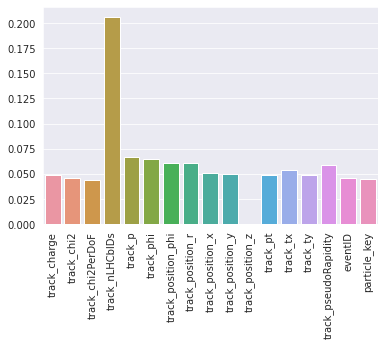

Time for Computation is 8.4985 minutes.


'Accuracy of the model is 79.97 %'

In [5]:
model_performance(data,rf)

In [3]:
sample_01=data[['track_chi2PerDoF', 'track_nLHCbIDs','track_p', 'track_phi', 'track_position_r','track_position_x', 'track_position_y', 'track_tx', 'track_ty', 'track_pseudoRapidity','particle_isDown_noVelo']]

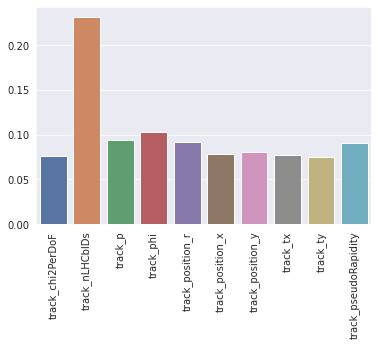

Time for Computation is 7.0772 minutes.


'Accuracy of the model is 79.44 %'

In [7]:
model_performance(sample_01,rf)

# Error Calculation in the Track Position Variables

In [4]:
radius_data=sample_01[['track_position_x','track_position_y','track_position_r']]
radius_data['manual_r']=np.sqrt((radius_data['track_position_x']**2)+(radius_data['track_position_y']**2))
radius_data['r_diff']=radius_data['track_position_r']-radius_data['manual_r']
radius_data['difference_class']=pd.qcut(radius_data['r_diff'],q=6,duplicates='drop',labels=['lower','medium','higher'])
radius_data.describe()


,track_position_x,track_position_y,track_position_r,manual_r,r_diff
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,-23.090667,-0.158682,782.262025,776.230970,6.031055
std,794.741344,463.096426,491.170191,494.034602,21.983584
min,-2664.905029,-2026.824097,6.317978,0.450815,0.000000
25%,-556.530994,-211.069716,367.219790,359.061060,0.000000
50%,-35.654013,-0.527894,680.627154,676.197019,0.000000
75%,504.021838,210.318092,1121.583544,1118.385205,2.005820
max,2678.922119,2019.488647,2860.249271,2860.249271,1571.272118


In [5]:
radius_data

,track_position_x,track_position_y,track_position_r,manual_r,r_diff,difference_class
12628665,808.678559,-94.755918,816.169534,814.211088,1.958446,medium
12426633,532.536245,378.706928,669.834887,653.462921,16.371966,higher
1708852,-437.228699,8.913488,437.319546,437.319546,0.000000,lower
8371672,248.494385,298.108765,388.095729,388.095729,0.000000,lower
8494564,-799.917725,87.851021,804.727387,804.727387,0.000000,lower
...,...,...,...,...,...,...
15446613,-5.330028,-230.851331,276.320223,230.912854,45.407369,higher
7773193,-240.939789,348.539642,423.712006,423.712006,0.000000,lower
7013917,674.544250,-19.584845,674.828506,674.828506,0.000000,lower
16470716,415.887969,32.759663,419.974923,417.176220,2.798702,medium


In [9]:
radius_data.loc[radius_data['r_diff']==radius_data['r_diff'].max()]

,track_position_x,track_position_y,track_position_r,manual_r,r_diff,difference_class
14442565,85.169632,188.606929,1494.164715,206.945499,1287.219215,higher


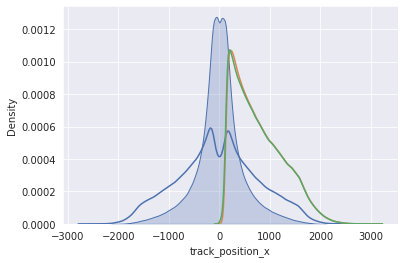

In [10]:
fig1=sns.kdeplot(radius_data['track_position_x'])
fig2=sns.kdeplot(radius_data['track_position_y'],shade=True)
fig3=sns.kdeplot(radius_data['track_position_r'])
fig4=sns.kdeplot(radius_data['manual_r'])
plt.show()

In [11]:
# fig = px.scatter_3d(radius_data,x='track_position_x',z='track_position_y',y='track_position_r',color='difference_class')
# fig.show()

In [12]:
# sns.scatterplot(radius_data['track_position_x'],radius_data['track_position_y'],hue=radius_data['difference_class'])
# plt.show()

In [13]:
#To avoid correlated variables track position x and y with r
sample_02=sample_01.drop(['track_position_x','track_position_y'],axis=1)

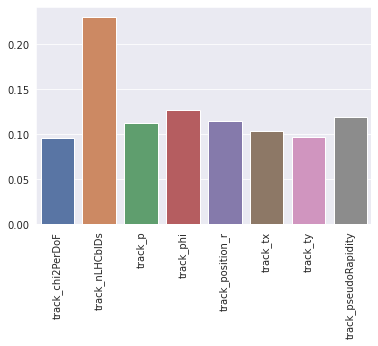

Time for Computation is 5.1283 minutes.


'Accuracy of the model is 77.41 %'

In [14]:
model_performance(sample_02,rf)

In [15]:
#Removing track_position_r and keeping x and y
sample_03=sample_01.drop(['track_position_r'],axis=1)

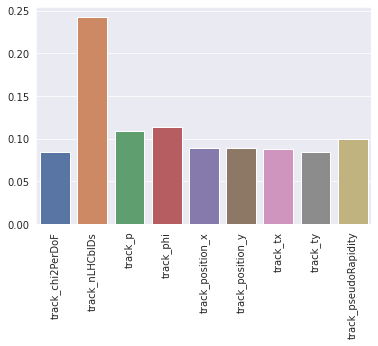

Time for Computation is 6.9001 minutes.


'Accuracy of the model is 79.06 %'

In [16]:
model_performance(sample_03,rf)

In [17]:
#Using manual calculated track_position_r value from X and Y
sample_04=sample_03.copy()
sample_04['updated_track_postion_r']=radius_data['manual_r']

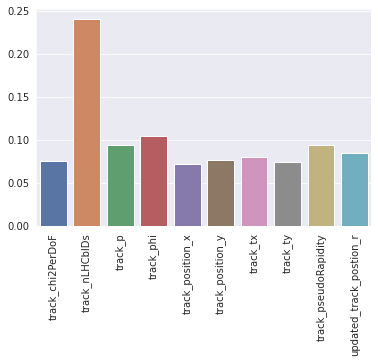

Time for Computation is 7.0787 minutes.


'Accuracy of the model is 79.08 %'

In [18]:
model_performance(sample_04,rf)

## Better model compared with given track_postion_r

In [19]:
#Considering all the variables for checking correlations between them.
sample_05=sample_01.copy()
sample_05['updated_track_postion_r']=radius_data['manual_r']

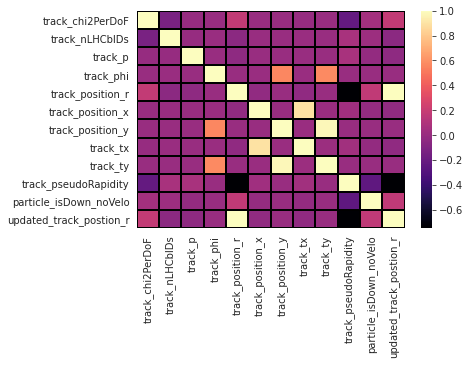

In [20]:
sns.heatmap(sample_05.corr(),linecolor='black',linewidths=2,cmap='magma')
plt.show()